# LEGAL TEXT CLASSIFICATION PROJECT


PROJECT : GIVEN LEGAL TEXT DATA ,I AIM TO CLASSIFY THE TEXT BASED ON DIFFERENT OUTCOMES . I WILL APPROACH THIS USING VARIOUS METHODS INCLUDING LINEARSVC ,RANDOMFOREST . WE CAN LEARN FROM THE UNIGRAMS AND BIGRAMS AND TRY TO MODEL THIS 
RELATIONSHIP. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from scipy.stats import randint

In [2]:
df = pd.read_csv("C:\\Datasets\\legal_text_classification\\legal_text_classification.csv")

In [3]:
df.head().T

,0,1,2,3,4
case_id,Case1,Case2,Case3,Case4,Case5
case_outcome,cited,cited,cited,cited,cited
case_title,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,Dr Martens Australia Pty Ltd v Figgins Holding...
case_text,Ordinarily that discretion will be exercised s...,The general principles governing the exercise ...,Ordinarily that discretion will be exercised s...,The general principles governing the exercise ...,The preceding general principles inform the ex...


In [4]:
df.shape

(24985, 4)

In [5]:
for column in df.columns :
    print (f"The column |< {column}> has the following unique values :{df[column].nunique()}")

The column |< case_id> has the following unique values :24985
The column |< case_outcome> has the following unique values :10
The column |< case_title> has the following unique values :18581
The column |< case_text> has the following unique values :17920


In [6]:
# I will create  a new dataframe with the case_outcome and case_text as the main values
df1 = df[['case_outcome','case_text']].copy()

In [7]:
# I will then remove any Nan values 
df1 = df1[pd.notnull(df1['case_text'])]

In [8]:
df1.head(10)

,case_outcome,case_text
0,cited,Ordinarily that discretion will be exercised s...
1,cited,The general principles governing the exercise ...
2,cited,Ordinarily that discretion will be exercised s...
3,cited,The general principles governing the exercise ...
4,cited,The preceding general principles inform the ex...
5,cited,I accept that the making of a rolled up offer ...
6,cited,The preceding general principles inform the ex...
7,cited,On the question of the level of unreasonablene...
8,applied,recent decision of the High Court in Australia...
9,followed,Hexal Australia Pty Ltd v Roche Therapeutics I...


In [9]:
df1.columns = ['outcome','text']
df1.columns

Index(['outcome', 'text'], dtype='object')

In [10]:
# DISPLAYING ALL THE POSSIBLE OUTCOMES
possible_outcomes = df1['outcome'].unique()
possible_outcomes

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed', 'approved'],
      dtype=object)

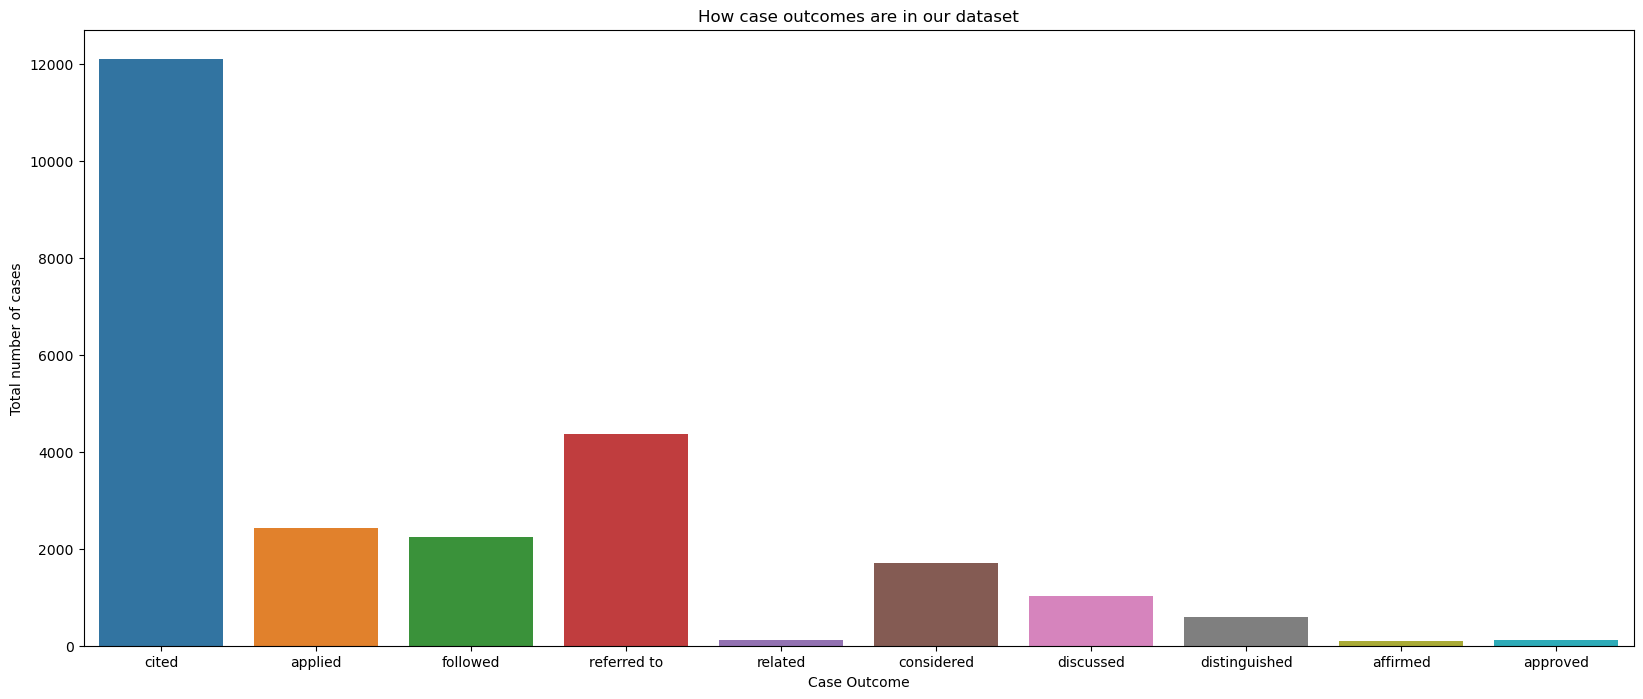

In [11]:
# visualize our outcomes
plt.figure(figsize=(20,8))
sns.countplot(x=df1['outcome'])
plt.xlabel("Case Outcome")
plt.ylabel("Total number of cases")
plt.title('How case outcomes are in our dataset')
plt.show()
# A lot of our legal texts were cited ,what could this mean??

In [14]:
category_id_df

,outcome,category_id
5173,applied,0
23104,cited,1
10915,referred to,2
10311,considered,3
24339,discussed,4
14079,followed,5
20413,affirmed,6
13068,distinguished,7
1057,approved,8
1554,related,9


In [15]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['outcome','category_id']])

In [16]:
category_to_id 

{'applied': 0,
 'cited': 1,
 'referred to': 2,
 'considered': 3,
 'discussed': 4,
 'followed': 5,
 'affirmed': 6,
 'distinguished': 7,
 'approved': 8,
 'related': 9}

df2.head()

In [18]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf.fit_transform(df2.text).toarray()
labels = df2['category_id']

In [ ]:
N = 3
for outcome,category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features,labels==category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' '))==1]
    bigrams = [v for v in feature_names if len(v.split(' '))==2]
    #trigrams = [v for v in feature_names if len(v.split(' '))==3]
    print("\n==> %s:" %(outcome))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))
    #print("  * Most Correlated Bigrams are: %s" %(', '.join(trigrams[-N:])))


==> affirmed:
  * Most Correlated Unigrams are: affirmed, lankan, fmca
  * Most Correlated Bigrams are: tribunal affirmed, 2008 fmca, anor 2008


In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [20]:
df2.text

5173     Notwithstanding the view I have formed that cl...
23104    In support of the abuse of process ground, the...
10915    If legal expenses are properly treated as havi...
6524     a representation is likely to mislead or decei...
10311    The terms of Direction No 21 , and the require...
                               ...                        
13275    The provision of severance pay in industrial i...
6505     In Louis Vuitton Malletier SA v Design Eleganc...
3428     The Rules do not compel the pleader to adopt s...
2835     A similar trust arrangement existed in In the ...
8077     it is contended that AMC should not be permitt...
Name: text, Length: 5000, dtype: object

In [21]:
df2.outcome

5173         applied
23104          cited
10915    referred to
6524           cited
10311     considered
            ...     
13275    referred to
6505     referred to
3428           cited
2835           cited
8077         applied
Name: outcome, Length: 5000, dtype: object

In [22]:
X = features
y = labels

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101,shuffle = True)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
mnb = MultinomialNB()
lsv = LinearSVC()

In [25]:
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print(classification_report(y_test,mnb_pred,target_names = df2['outcome'].unique()))

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

               precision    recall  f1-score   support

      applied       0.00      0.00      0.00        88
        cited       0.48      1.00      0.65       483
  referred to       0.00      0.00      0.00       188
   considered       0.00      0.00      0.00        56
    discussed       0.00      0.00      0.00        45
     followed       0.33      0.01      0.02       104
     affirmed       0.00      0.00      0.00         2
distinguished       0.00      0.00      0.00        21
     approved       0.00      0.00      0.00        10
      related       0.00      0.00      0.00         3

     accuracy                           0.48      1000
    macro avg       0.08      0.10      0.07      1000
 weighted avg       0.27      0.48      0.32      1000



In [26]:
lsv.fit(X_train,y_train)
lsv_pred = mnb.predict(X_test)
print(classification_report(y_test,lsv_pred,target_names = df2['outcome'].unique()))

               precision    recall  f1-score   support

      applied       0.00      0.00      0.00        88
        cited       0.48      1.00      0.65       483
  referred to       0.00      0.00      0.00       188
   considered       0.00      0.00      0.00        56
    discussed       0.00      0.00      0.00        45
     followed       0.33      0.01      0.02       104
     affirmed       0.00      0.00      0.00         2
distinguished       0.00      0.00      0.00        21
     approved       0.00      0.00      0.00        10
      related       0.00      0.00      0.00         3

     accuracy                           0.48      1000
    macro avg       0.08      0.10      0.07      1000
 weighted avg       0.27      0.48      0.32      1000



C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred,target_names = df2['outcome'].unique()))

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

               precision    recall  f1-score   support

      applied       0.29      0.02      0.04        88
        cited       0.50      0.98      0.67       483
  referred to       0.87      0.11      0.19       188
   considered       0.62      0.09      0.16        56
    discussed       0.00      0.00      0.00        45
     followed       0.69      0.11      0.18       104
     affirmed       0.00      0.00      0.00         2
distinguished       1.00      0.10      0.17        21
     approved       0.00      0.00      0.00        10
      related       1.00      0.33      0.50         3

     accuracy                           0.52      1000
    macro avg       0.50      0.17      0.19      1000
 weighted avg       0.56      0.52      0.39      1000



THE PROJECT WAS ALL ABOUT CREATING A MODEL THAT CLASSIFIES TEXT AS EITHER approved or cited or related ..etc .
I SAMPLED 5000 texts from the original dataframe . I then fit  various models ( Linear  SVC,MultinomialNB and RandomForestClassifier).
Random Forest was the better model achieving an accuracy score of 52 % . I intend to add the idea of embeddings to this project.